In [1]:

import pandas as pd
from LAY2 import  ensemble_models
from DB.DB import db
from utils import Args



Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [13]:
# 加载数据集
data_loader = db('../DataBase/DB2.csv')
# data_loader.get_data()
# data_loader.data = data_loader.data.iloc[:10, :]
# 五折切割
train, test = next(data_loader.get_folds())

data already finished size =13329
fold0


In [14]:
# test.head()

In [15]:
# 定义参数类
args = Args(train, test, AFP=True, RF=True, MPNN=True,
            SVR=True, save_r=True, plot=True,
            AD_FP=False)

# 实例化集成模型
eb = ensemble_models()

size of train is(10661, 3) ,test is (2666, 3)
start training AFP 
完成转换,start fitting
train_mae 0.15333716434863873
test_mae 0.3780142813363368
test_R2 0.6161575949513614


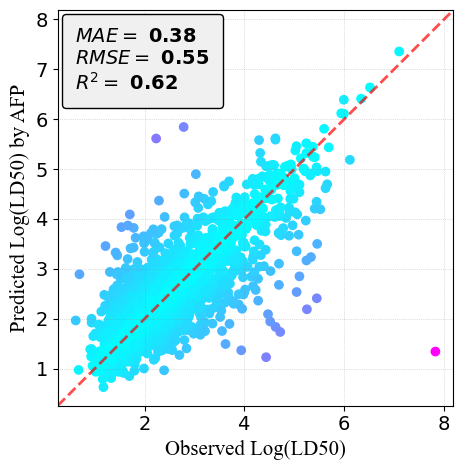

============AFP over============
start training MPNN 


10661it [00:00, 242303.83it/s]
100%|██████████| 10661/10661 [00:01<00:00, 6267.44it/s]
2666it [00:00, 266365.28it/s]
100%|██████████| 2666/2666 [00:00<00:00, 6235.57it/s]
2666it [00:00, 266143.39it/s]
100%|█████████▉| 213/214 [00:37<00:00, 73.73it/s]
                                                 
100%|█████████▉| 213/214 [00:36<00:00, 74.70it/s]
                                                 
 98%|█████████▊| 209/214 [00:36<00:00, 74.32it/s]
                                                 
 99%|█████████▊| 211/214 [00:36<00:00, 70.16it/s]
                                                 
 96%|█████████▌| 205/214 [00:36<00:00, 70.62it/s]
                                                 
 99%|█████████▉| 212/214 [00:36<00:00, 74.80it/s]
                                                 
100%|█████████▉| 213/214 [00:36<00:00, 74.61it/s]
                                                 
 99%|█████████▊| 211/214 [00:36<00:00, 71.79it/s]
                                                 

Loading training args


Exception ignored in: <finalize object at 0x27e2a95baa0; dead>
Traceback (most recent call last):
  File "C:\Users\donkey\.conda\envs\Miku\lib\weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "C:\Users\donkey\.conda\envs\Miku\lib\tempfile.py", line 797, in _cleanup
    _shutil.rmtree(name)
  File "C:\Users\donkey\.conda\envs\Miku\lib\shutil.py", line 516, in rmtree
    return _rmtree_unsafe(path, onerror)
  File "C:\Users\donkey\.conda\envs\Miku\lib\shutil.py", line 377, in _rmtree_unsafe
    onerror(os.scandir, path, sys.exc_info())
  File "C:\Users\donkey\.conda\envs\Miku\lib\shutil.py", line 374, in _rmtree_unsafe
    with os.scandir(path) as scandir_it:
FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'C:\\Users\\donkey\\AppData\\Local\\Temp\\tmpvjb5hlop'


Setting molecule featurization parameters to default.
Loading data


2666it [00:00, 295992.76it/s]
100%|██████████| 2666/2666 [00:00<00:00, 221904.99it/s]


Validating SMILES
Test size = 2,666


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda



100%|██████████| 1/1 [00:34<00:00, 34.23s/it]  


Saving predictions to tmp/MPNN/test1.csv
Elapsed time = 0:00:35
Loading training args
Setting molecule featurization parameters to default.
Loading data


10661it [00:00, 75072.19it/s]
100%|██████████| 10661/10661 [00:00<00:00, 242265.76it/s]


Validating SMILES
Test size = 10,661


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda



100%|██████████| 1/1 [00:36<00:00, 36.52s/it]    


Saving predictions to tmp/MPNN/train_MPNN.csv
Elapsed time = 0:00:37


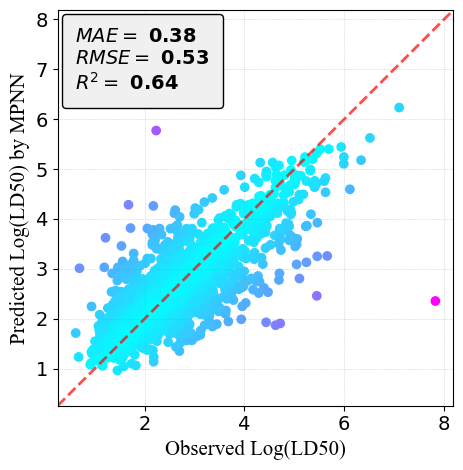

============MPNN over============
start training RF 
train_mae 0.21438032975725016
test_mae 0.38477841768958393
test_R2 0.615072321105715


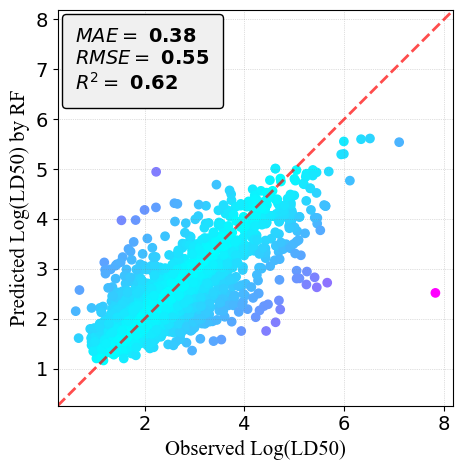

============RF over============
start training SVR 
train_mae 0.19241710421297864
test_mae 0.37826333428903225
test_R2 0.6267760704021725


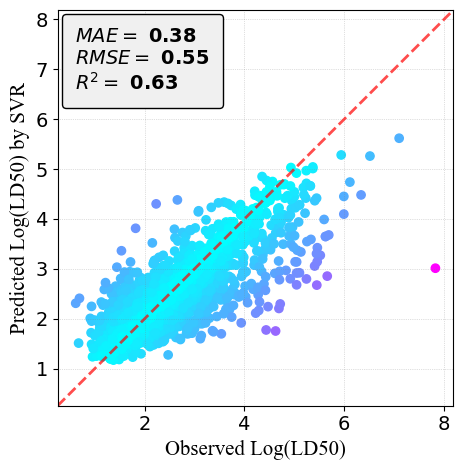

============SVR over============


In [16]:
# 训练第一层模型，save选择是否保存模型
eb.Lay1_models_train(args, save=True)

In [17]:
# 预测未知数据集，需要保证smiles列存在

# pdf = test.iloc[0:,2:3]
# args.predict_df = pdf
# 第一层模型进行预测
# eb.Lay1_models_predict(args)


,smiles
9,COc1cc(C=CC(=S)N2CCOCC2)cc(OC)c1OC
11,CN(CCCl)CCCl
13,CC(C)(Oc1ccccc1)C(=O)OCCN1CCOCC1
29,C(=NC(N=Cc1ccco1)c1ccco1)c1ccco1
32,CCCCCCCCCCCC[N+](CCO)(CCO)Cc1ccccc1
...,...
13306,N#C/N=C1\SCCN1Cc1ccc(Cl)nc1
13315,CCOC(=S)/C=C/c1ccc([N+](=O)[O-])cc1
13324,N#C/N=c1\ccccn1Cc1ccccc1Cl
13325,N#C/N=c1\ccccn1Cc1ccc(Cl)cc1


start fitting L2 models
Start fitting MLP


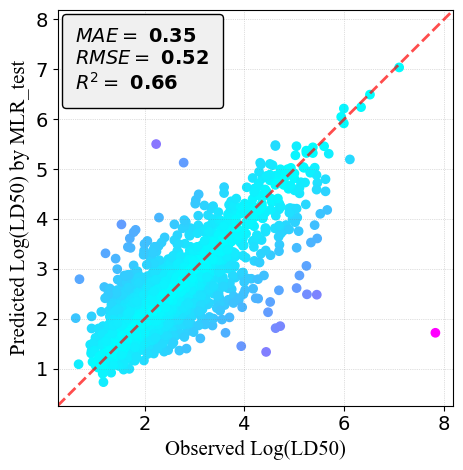

Save MLR models
Start fitting RF in L2


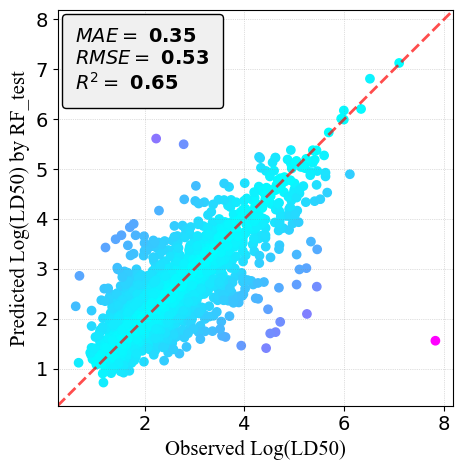

Save RF models
start fitting SVR model


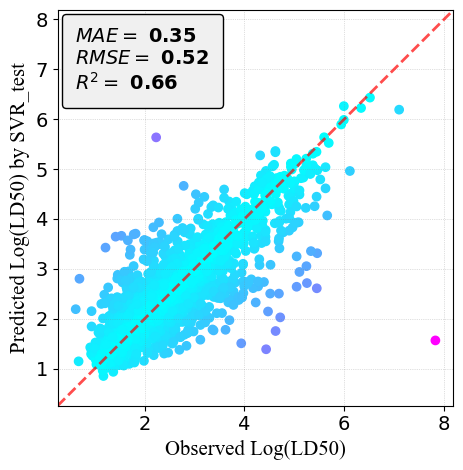

Save SVR models


In [19]:
# 设置第二层模型参数 args.model_lis_L2
args.model_lis_L2 = [True for i in range(3)]
args.plot = True
eb.Lay2_models_train(args,save=True)

In [20]:
# eb.Lay2_models_predict()


L3,Coefficients: [0.         1.00107386 0.        ]
L3,Residuals: 6.678936356420307


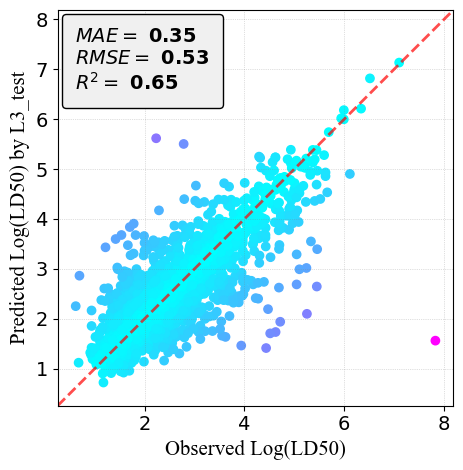

In [21]:
# 训练第三层模型，
# 第三层模型为非负最小二乘，只有保存权重和偏置
eb.Lay3_models_train(args)

In [25]:
eb.lis_coef
eb.lis_res

6.678936356420307

In [23]:
# eb.Lay3_models_predict()

In [24]:
# eb.L3_predict_array